In [ ]:
import pandas as pd

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:

# Read the CSV files
df1 = pd.read_csv('/content/cleaning_bean_data.csv')
# Rename columns
df1 = df1.rename(columns={
    'Number' : 'Number bean',
    'Total wet weight' : 'Total wet weight bean',
    'Cotyledon dry weight':'Cotyledon dry weight bean',
    'Cotyledon length':'Cotyledon length bean',
    'Cotyledon width':'Cotyledon width bean',
    'Shape':'Shape bean',
    'Colour':'Colour bean',
})

df2 = pd.read_csv('/content/cleaning_flower_data.csv')
df2 = df2.rename(columns={
    'Self compatibility': 'Self compatibility flower',
    'Ovule number': 'Ovule number flower',
    'Ligule colour': 'Ligule colour flower',
    'Stamen colour': 'Stamen colour flower',
    'Sepal length': 'Sepal length flower',
    'Ligule width': 'Ligule width flower',
    'Style length': 'Style length flower',
})

df3 = pd.read_csv('/content/fruit_v3.csv')
df3 = df3.rename(columns={
    'Length':'Length fruit',
    'Breadth': 'Breadth fruit',
    'Weight': 'Weight fruit',
    'Length breadth ratio': 'Length breadth ratio fruit',
    'Shape': 'Shape fruit',
    'Rugosity': 'Rugosity fruit',
    'Colour': 'Colour fruit',
    'Basal constriction': 'Basal constriction fruit',
    'Apex form': 'Apex form fruit',
    'Hardness': 'Hardness fruit',
    'Info': 'Info fruit',
    'Furrow desc': 'Furrow desc fruit',
})


# Merge the DataFrames on 'Clone name' and 'Refcode' columns
merged_df = pd.merge(df1, df2, on=['Clone name + Refcode'], how='inner')
merged_df = pd.merge(merged_df, df3, on=['Clone name + Refcode'], how='inner')

# Optionally, you can save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file_full_data.csv', index=False)

# Print the merged DataFrame
print(merged_df)


       Clone name + Refcode  Number bean  Total wet weight bean  \
0           CATIE-R1_PHI13A         29.0                   93.4   
1           CATIE-R4_PHI13A         35.0                  144.7   
2           CATIE-R6_PHI13A         31.0                  127.2   
3             CC 137_PHI13A         27.0                  117.3   
4             ICS 95_PHI13A         33.0                  102.0   
...                     ...          ...                    ...   
1891  VEN B 66 [ICT]_BEKAD1         43.0                   51.1   
1892       YAL 1 /S2_BEKAD1         45.0                   55.5   
1893         YAL 5/T_BEKAD1         35.0                   59.7   
1894       YAL 6 /S3_BEKAD1         34.0                   46.7   
1895       YAL 6 /S4_BEKAD1         36.0                   45.8   

      Cotyledon dry weight bean  Cotyledon length bean  Cotyledon width bean  \
0                         0.866                 20.195                11.915   
1                         1.022    

In [ ]:
    #replacing "-" with NaN in both numerical and categorical columns

    #numeric_columns=result.select_dtypes(include=['number']).columns
    # List of all columns
    all_columns = merged_df.columns
    # Identify non-numeric columns
    categorical_columns = [col for col in all_columns if col not in numeric_columns]
    # Replace "-" with NaN in both numerical and categorical columns
    merged_df[numeric_columns] = merged_df[numeric_columns].replace('-', np.nan)
    merged_df[categorical_columns] = merged_df[categorical_columns].replace('-', np.nan)
    # Convert numerical columns to float
    merged_df[numeric_columns] = merged_df[numeric_columns].astype(float)

Total wet weight  פונקציית מטרה




In [ ]:
merged_df.drop(subset=['Info fruit'], inplace=True)


TypeError: DataFrame.drop() got an unexpected keyword argument 'subset'

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Clone name + Refcode        1896 non-null   object 
 1   Number bean                 1896 non-null   float64
 2   Total wet weight bean       1896 non-null   float64
 3   Cotyledon dry weight bean   1896 non-null   float64
 4   Cotyledon length bean       1896 non-null   float64
 5   Cotyledon width bean        1896 non-null   float64
 6   Shape bean                  1896 non-null   object 
 7   Colour bean                 1896 non-null   object 
 8   Self compatibility flower   1896 non-null   object 
 9   Ovule number flower         1896 non-null   float64
 10  Ligule colour flower        1896 non-null   object 
 11  Stamen colour flower        1896 non-null   object 
 12  Sepal length flower         1896 non-null   float64
 13  Ligule width flower         1896 

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3861 entries, 0 to 3860
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Clone name + Refcode        3861 non-null   object 
 1   Number bean                 3420 non-null   float64
 2   Total wet weight bean       2000 non-null   float64
 3   Cotyledon dry weight bean   2606 non-null   float64
 4   Cotyledon length bean       2473 non-null   float64
 5   Cotyledon width bean        2473 non-null   float64
 6   Shape bean                  2135 non-null   object 
 7   Colour bean                 2012 non-null   object 
 8   Self compatibility flower   1445 non-null   object 
 9   Ovule number flower         2147 non-null   float64
 10  Ligule colour flower        2667 non-null   object 
 11  Stamen colour flower        2547 non-null   object 
 12  Sepal length flower         2615 non-null   float64
 13  Ligule width flower         2615 

In [ ]:
dont_tuch='Clone name + Refcode ','Total wet weight bean'

In [ ]:
# Identify object type columns
object_columns = merged_df.select_dtypes(include=['object']).columns

# Print object columns
print("Object columns:")
for column in object_columns:
    print(column)



Object columns:
Shape bean
Colour bean
Clone name + Refcode
Self compatibility flower
Ligule colour flower
Stamen colour flower
Shape fruit
Rugosity fruit
Colour fruit
Basal constriction fruit
Apex form fruit
Hardness fruit
Info fruit
Furrow desc fruit


In [ ]:
# Specify the columns of interest
fruit_columns = [
    'Rugosity fruit',
    'Basal constriction fruit',
    'Apex form fruit',
    'Hardness fruit',
    'Furrow desc fruit',
    'Colour bean'
]

# Iterate over each column and print its unique values
for column in fruit_columns:
    unique_values = merged_df[column].unique()
    print(f"Unique values in column '{column}':")
    for value in unique_values:
        print(value)
    print()  # Empty line for separation between columns


Unique values in column 'Rugosity fruit':
moderate
slight
intense
smooth

Unique values in column 'Basal constriction fruit':
moderate
slight
strong
absent
wideshoulder

Unique values in column 'Apex form fruit':
attenuate
acute
obtuse
indented
mammillate
rounded

Unique values in column 'Hardness fruit':
soft
moderate
hard

Unique values in column 'Furrow desc fruit':
paired and intermediate separation
paired and wide separation
paired and slight separation
equidistant and intermediate separation

Unique values in column 'Colour bean':
dark purple
purple
light purple



In [ ]:
columns_with_meaning_to_order=['Rugosity fruit','Hardness fruit','Basal constriction fruit','Colour bean']

In [ ]:
# Define mappings for columns with meaningful order
column_mappings = {
    'Rugosity fruit': {'smooth': 0, 'slight': 1, 'moderate': 2, 'intense': 3},
    'Hardness fruit': {'soft': 0, 'moderate': 1, 'hard': 2},
    'Basal constriction fruit': {'absent': 0, 'slight': 1, 'moderate': 2, 'strong': 3, 'wideshoulder': 4},
    'Colour bean': {'light purple': 0, 'purple': 1, 'dark purple': 2}
}

# Replace values in columns with meaningful order
for column, mapping in column_mappings.items():
    merged_df[column] = merged_df[column].replace(mapping)

# Print the updated DataFrame
print(merged_df)


       Clone name + Refcode  Number bean  Total wet weight bean  \
0           CATIE-R1_PHI13A         29.0                   93.4   
1           CATIE-R4_PHI13A         35.0                  144.7   
2           CATIE-R6_PHI13A         31.0                  127.2   
3             CC 137_PHI13A         27.0                  117.3   
4             ICS 95_PHI13A         33.0                  102.0   
...                     ...          ...                    ...   
1891  VEN B 66 [ICT]_BEKAD1         43.0                   51.1   
1892       YAL 1 /S2_BEKAD1         45.0                   55.5   
1893         YAL 5/T_BEKAD1         35.0                   59.7   
1894       YAL 6 /S3_BEKAD1         34.0                   46.7   
1895       YAL 6 /S4_BEKAD1         36.0                   45.8   

      Cotyledon dry weight bean  Cotyledon length bean  Cotyledon width bean  \
0                         0.866                 20.195                11.915   
1                         1.022    

In [ ]:
# Specify the column(s) to drop
columns_to_drop = ['Info fruit']

# Drop the specified column(s)
merged_df.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame to verify the column has been dropped
print(merged_df)


NameError: name 'merged_df' is not defined

In [ ]:
# Identify object type columns
object_columns = merged_df.select_dtypes(include=['object']).columns

# Print object columns
print("Object columns:")
for column in object_columns:
    print(column)


NameError: name 'merged_df' is not defined

In [ ]:
# Identify object type columns excluding 'clone+ref'
object_columns = [col for col in merged_df.columns if merged_df[col].dtype == 'object' and col != 'Clone name + Refcode']

# Create dummy variables for object type columns excluding 'clone+ref'
dummy_df = pd.get_dummies(merged_df, columns=object_columns)

# Print the first few rows of the dummy DataFrame
print(dummy_df.head())


NameError: name 'merged_df' is not defined

In [ ]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 52 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Clone name + Refcode                                       1896 non-null   object 
 1   Number bean                                                1896 non-null   float64
 2   Total wet weight bean                                      1896 non-null   float64
 3   Cotyledon dry weight bean                                  1896 non-null   float64
 4   Cotyledon length bean                                      1896 non-null   float64
 5   Cotyledon width bean                                       1896 non-null   float64
 6   Colour bean                                                1896 non-null   int64  
 7   Ovule number flower                                        1896 non-null   float64
 8   Sepal le

In [ ]:
wcss = []
k_values = range(1, 11)  # Try K values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Step 4: Plot the Elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

ValueError: could not convert string to float: 'CATIE-R1_PHI13A'

In [ ]:
def choosing_the_K(data):
  copy_data=data.copy()
  # Drop the specified column(s)
  copy_data.drop(columns='Clone name + Refcode', inplace=True)
  # Step 2: Perform K-means clustering k=10
  inertia_=[]
  # data normalization
  sc_data=MinMaxScaler()
  sc_data=sc_data.fit_transform(copy_data)
   #step 3 choosing the k
  for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sc_data)
    inertia_.append(kmeans.inertia_)

    #step 3 choosing the k
  plt.plot(range(1,11),inertia_)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Clone name + Refcode        1896 non-null   object 
 1   Number bean                 1896 non-null   float64
 2   Total wet weight bean       1896 non-null   float64
 3   Cotyledon dry weight bean   1896 non-null   float64
 4   Cotyledon length bean       1896 non-null   float64
 5   Cotyledon width bean        1896 non-null   float64
 6   Shape bean                  1896 non-null   object 
 7   Colour bean                 1896 non-null   int64  
 8   Self compatibility flower   1896 non-null   object 
 9   Ovule number flower         1896 non-null   float64
 10  Ligule colour flower        1896 non-null   object 
 11  Stamen colour flower        1896 non-null   object 
 12  Sepal length flower         1896 non-null   float64
 13  Ligule width flower         1896 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

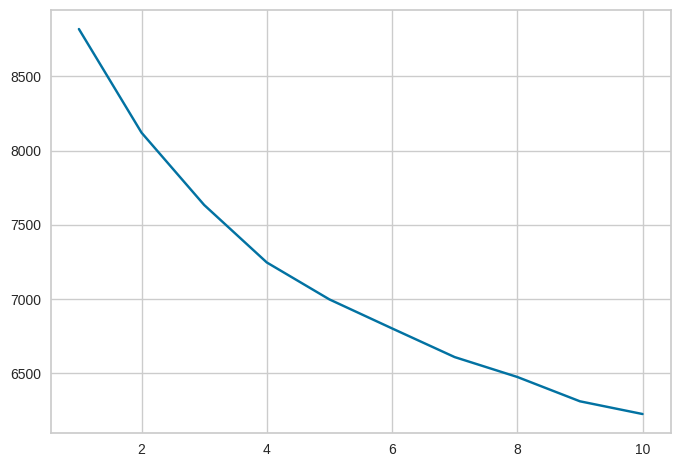

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df = pd.read_csv('/content/dummy+order_data.csv')

choosing_the_K(df)


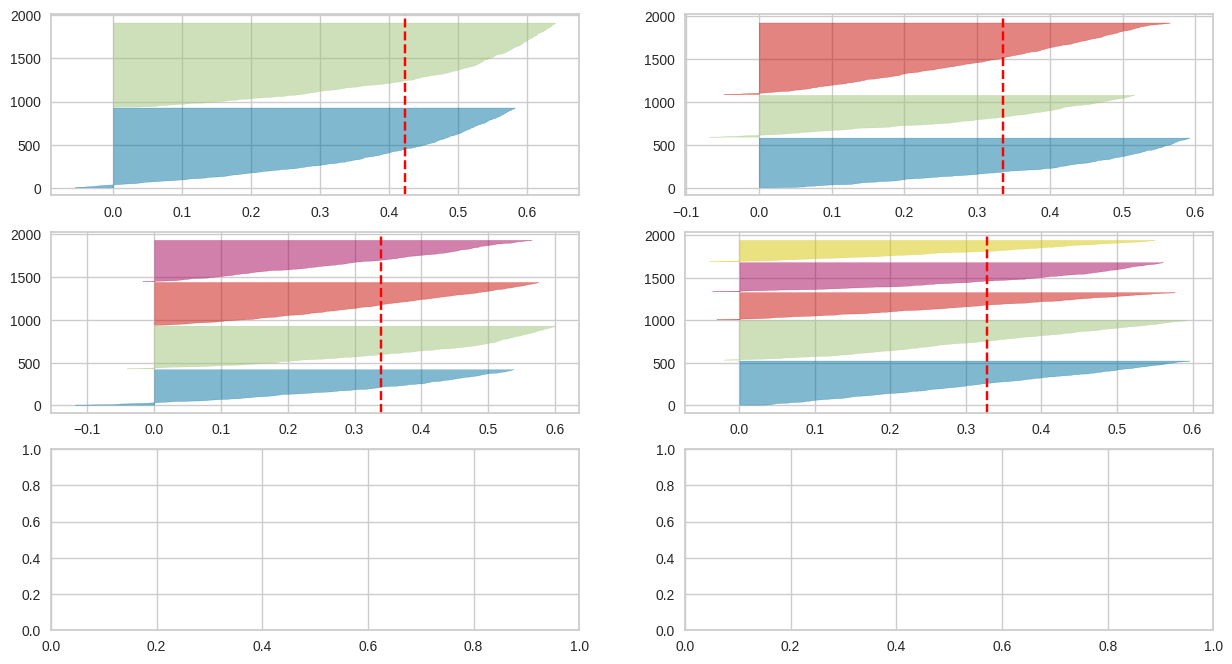

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

# Load the IRIS dataset
copy_data = df.copy()
copy_data.drop(columns='Clone name + Refcode', inplace=True)
pca = PCA(n_components=2)  # You can adjust the number of components as needed
pca_data = pca.fit_transform(copy_data)
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.41378932910778105


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

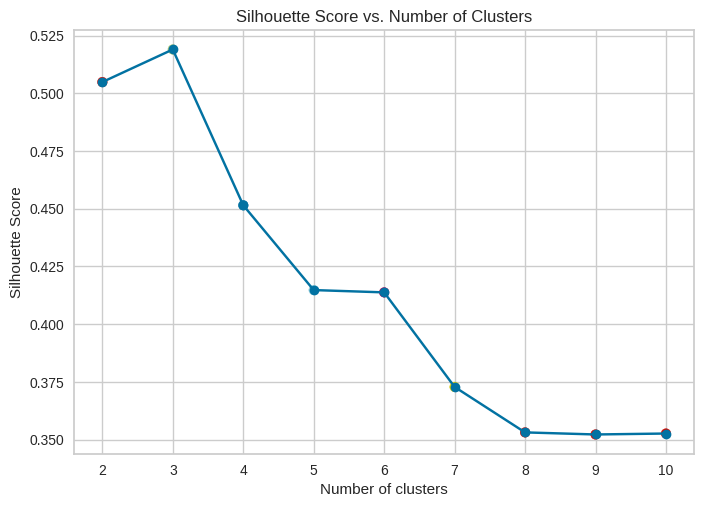

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'copy_data' with your data
copy_data = df.copy()
copy_data.drop(columns='Clone name + Refcode', inplace=True)

# Step 1: Preprocess your data if necessary (e.g., scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(copy_data)

# Step 2: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Adjust number of components as needed
pca_data = pca.fit_transform(scaled_data)

# Step 3: Choose the number of clusters (K) using some method like the Elbow method
K = 6

# Step 4: Fit a clustering algorithm to your data
kmeans = KMeans(n_clusters=K, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Step 5: Calculate silhouette score
silhouette_avg = silhouette_score(pca_data, cluster_labels)

print("Silhouette Score:", silhouette_avg)

# Step 6: Optionally, plot silhouette scores for different values of K
# This step can help you choose the optimal number of clusters
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

# Adding colors to the clusters
colors = np.array(['r', 'g', 'b', 'c', 'm', 'y','r','r','r'])
plt.scatter(range(2, 11), silhouette_scores, c=colors[:len(silhouette_scores)])
plt.show()



In [ ]:
def New_feature_by_Clustering2(df, k, feature1, feature2):
    copy_data = df.copy()
    copy_data.drop(columns='Clone name + Refcode', inplace=True)
    pca = PCA(n_components=2)  # You can adjust the number of components as needed
    pca_data = pca.fit_transform(copy_data)
    sc_data = MinMaxScaler()
    sc_data = sc_data.fit_transform(copy_data)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sc_data)
    #pca['Clone_Group'] = kmeans.labels_

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
    plt.title('KMeans Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()
    print(kmeans.cluster_centers_)

נירצה לייצר עמודה חדשה שבה כול שורה מקובצצת לאשכול וככה אולי  זה יכול לעזור למודל לילמוד את הנתונים בעזרת קבוצות עכשיו לפי כלל המרפק החלטנו לחלק ל6 קבוצות כאשר ביצענו את הפיסיאי כדי ליראות את האשכולות מקובצים בצורה נכונה.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


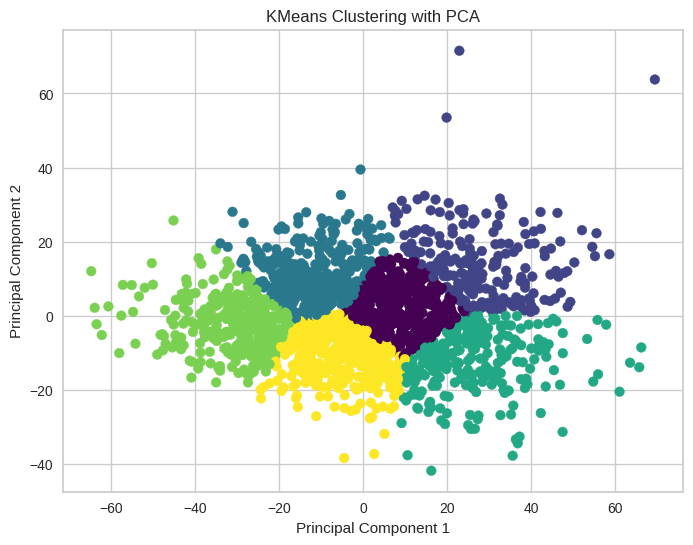

[[0.54726495 0.38669033]
 [0.69249496 0.49742774]
 [0.39696702 0.46321864]
 [0.68032922 0.25650285]
 [0.25184591 0.35201508]
 [0.4376807  0.27894019]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 52 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Number bean                                                1896 non-null   float64
 1   Total wet weight bean                                      1896 non-null   float64
 2   Cotyledon dry weight bean                                  1896 non-null   float64
 3   Cotyledon length bean                                      1896 non-null   float64
 4   Cotyledon width bean                                       1896 non-null   float64
 5   Colour bean                                                1896 non-null   int64  
 6   Ovule number flower              

In [ ]:
df= New_feature_by_Clustering_with_PCA(df,6,'Clone_Group','Total wet weight bean')

In [ ]:
from sklearn.decomposition import PCA

def New_feature_by_Clustering_with_PCA(df, k, feature1, feature2):
    copy_data = df.copy()
    copy_data.drop(columns='Clone name + Refcode', inplace=True)

    # PCA
    pca = PCA(n_components=2)  # You can adjust the number of components as needed
    pca_data = pca.fit_transform(copy_data)

    # Scaling
    sc_data = MinMaxScaler()
    sc_data = sc_data.fit_transform(pca_data)

    # KMeans Clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sc_data)
    copy_data['Clone_Group'] = kmeans.labels_

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
    #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
    plt.title('KMeans Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    #plt.legend()
    plt.show()
    #print(kmeans.cluster_centers_)
     # Export the DataFrame to a CSV file
    copy_data.to_csv('merged_full_data_with_full_names_with_clone_num.csv', index=False)
    copy_data.info()
    copy_data.head()




In [ ]:
copy_data.info()
copy_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 51 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Number bean                                                1896 non-null   float64
 1   Total wet weight bean                                      1896 non-null   float64
 2   Cotyledon dry weight bean                                  1896 non-null   float64
 3   Cotyledon length bean                                      1896 non-null   float64
 4   Cotyledon width bean                                       1896 non-null   float64
 5   Colour bean                                                1896 non-null   int64  
 6   Ovule number flower                                        1896 non-null   int64  
 7   Sepal length flower                                        1896 non-null   float64
 8   Ligule w

,Number bean,Total wet weight bean,Cotyledon dry weight bean,Cotyledon length bean,Cotyledon width bean,Colour bean,Ovule number flower,Sepal length flower,Ligule width flower,Style length flower,...,Apex form fruit_acute,Apex form fruit_attenuate,Apex form fruit_indented,Apex form fruit_mammillate,Apex form fruit_obtuse,Apex form fruit_rounded,Furrow desc fruit_equidistant and intermediate separation,Furrow desc fruit_paired and intermediate separation,Furrow desc fruit_paired and slight separation,Furrow desc fruit_paired and wide separation
0,29.0,93.4,0.866,20.195,11.915,2,41,8.5,3.0,2.2,...,0,1,0,0,0,0,0,1,0,0
1,35.0,144.7,1.022,22.418,12.483,1,44,8.4,2.6,3.4,...,0,1,0,0,0,0,0,1,0,0
2,31.0,127.2,0.866,20.195,11.915,0,41,7.0,3.3,1.7,...,0,1,0,0,0,0,0,1,0,0
3,27.0,117.3,0.866,20.195,11.915,2,30,8.7,2.6,1.3,...,0,1,0,0,0,0,0,1,0,0
4,33.0,102.0,1.022,22.418,12.483,0,33,8.2,2.9,2.1,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Export the DataFrame to a CSV file
copy_data.to_csv('merged_full_data_with_full_names_with_clone_num.csv', index=False)
